In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import sys
sys.path.insert(1, '/p/project/chhb19/gaertner2/lkf_tools/lkf_tools/')
from dataset import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':15})
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/p/project/chhb19/gaertner2/data/awicm_cvmix/'
path_lkfs = path + 'dump/'

path_scratch = '/p/scratch/chhb19/gaertner2/'
path_nc = path_scratch + 'interpolated_fesom_output/1km/'

In [3]:
year = 2015

In [4]:
# create the lkf_data object so the finetuning function can be used
# and get the indices of the Arctic basin

lkf_data = process_dataset(netcdf_file = path_nc + f'1km_{year}.nc',
                           output_path = path_lkfs,
                           dog_thres = 1,
                           t_red = 1)
lkf_data.detect_lkfs(indexes=[0])

# arctic basin
z = 70
a = max([0,lkf_data.index_y[0][0]-1])
b = lkf_data.index_y[0][-1]+2
c = max([0,lkf_data.index_x[0][0]-1])
d = lkf_data.index_x[0][-1]+2 - z
e = lkf_data.red_fac

lon = lkf_data.lon[a:b:e,c:d:e]
lat = lkf_data.lat[a:b:e,c:d:e]

  -->  Compute dxu and dyu from lon,lat using SSMI projection
Compute deformation rates and detect features for day 1
Start detection routines


In [5]:
def plot(i, vmin):
    fig = plt.figure(figsize=[16, 8])
    axs = [plt.subplot(1,2,col, projection=ccrs.Orthographic(0, 90)) for col in [1,2]]

    file = xr.open_dataset(path_nc + f'1km_{year}.nc')
    axs[0].pcolormesh(file.ULON[a:b,c:d], file.ULAT[a:b,c:d],
                    file.A.isel(time=i)[a:b,c:d],
                    cmap = cmocean.cm.ice, vmin=vmin, vmax=1,
                    transform=ccrs.PlateCarree())

    axs[1].pcolormesh(lon, lat, np.zeros_like(lon), transform = ccrs.PlateCarree(), cmap='viridis', vmin=0, vmax=1)
    axs[1].pcolormesh(lon, lat, lkf_data.calc_eps(i)[0][:,:-z],
                      cmap='viridis', vmin=0, vmax=0.5,
                      transform=ccrs.PlateCarree())

    axs[1].pcolormesh(lon, lat, lkf_tune[:,:-z], transform=ccrs.PlateCarree())

    for ax in axs:
        ax.add_feature(cfeature.LAND, zorder=2, edgecolor='black')

    fig.tight_layout()
    
    day = str(i+1)
    day.rjust(3 + len(day), '0')
    print(datetime.strptime(f'{year}-{day}', "%Y-%j").strftime("%m-%d-%Y"))

### Find a Suitable Value For dog_thresh

In [6]:
i = 0

In [7]:
lkf_tune = lkf_data.finetuning(i, dog_thres=25, aice_thresh=0, use_eps=False, plot=False)

01-01-2015


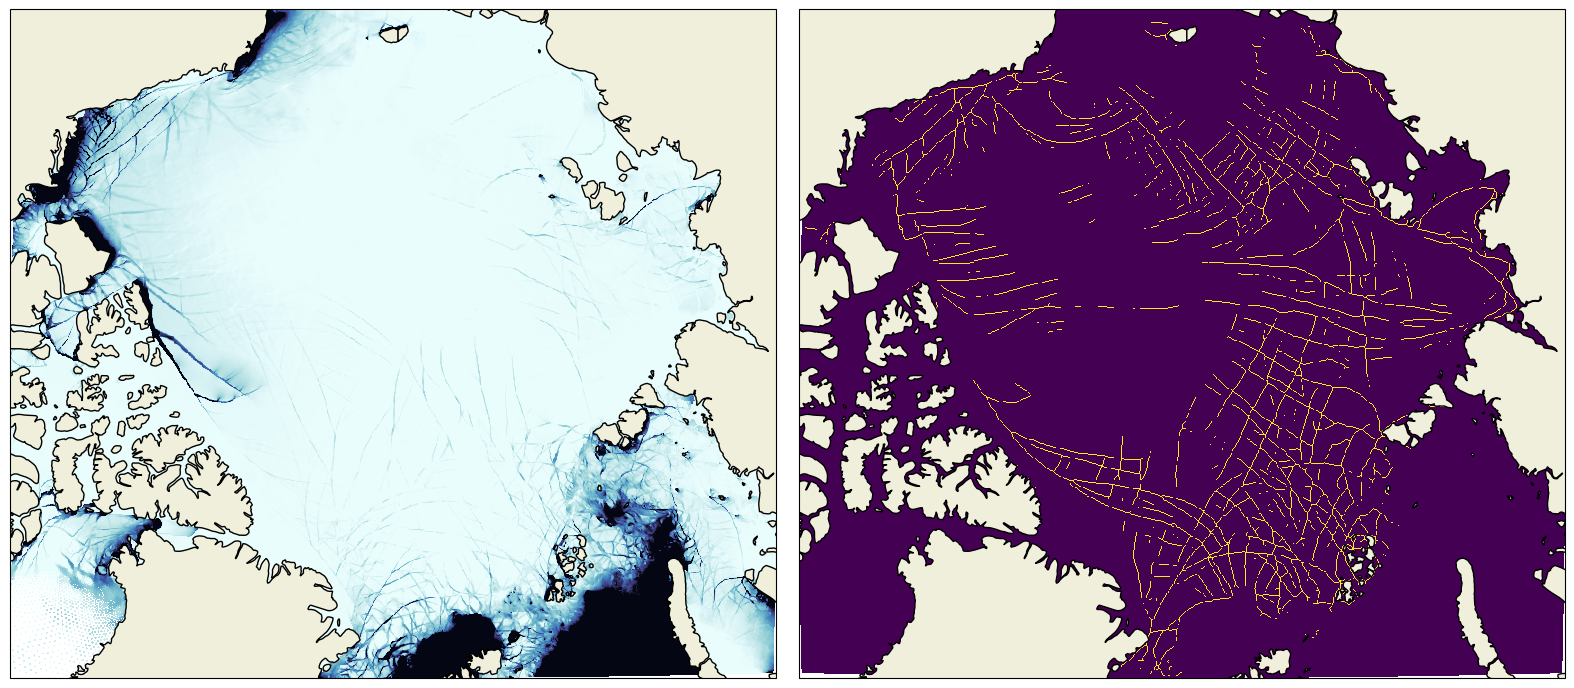

In [8]:
plot(i, 0.8)

In [9]:
lkf_tune = lkf_data.finetuning(i, dog_thres=10, aice_thresh=0.7, use_eps=False, plot=False)

01-01-2015


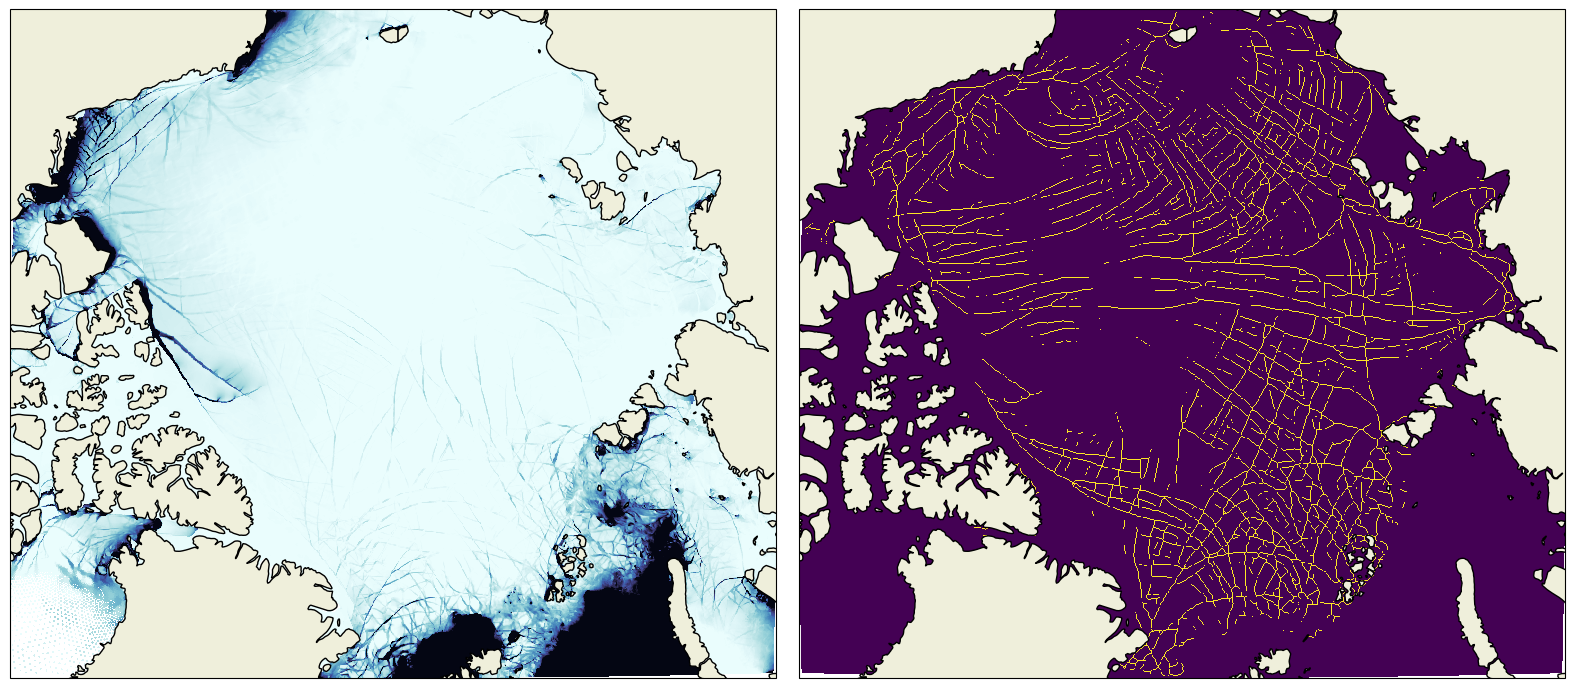

In [10]:
plot(i, 0.8)